<a href="https://colab.research.google.com/github/harithmote98/harith_INFO5731_Fall2021/blob/main/In_class_exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
The text classification task that I am going to perform is sentiment analysis of Twitter data.Below I am going the scrap 500 tweets of barack obama
and draw some meaningful insights with the tweets.
Firstly I will scrap the posted time,user_id and tweets of barack obama then I am going to do some pre-processing like removing special characters,hyperlinks,mentions.etc.
After that I will remove stop words.Stop words can deviate the data or information,then do stemming which can remove ing,es..,etc so that we can only have stem word.
Then did Lemmatization which considers the context and converts the word to its meaningful base form.

The features that I am extracting is polarity and subjectivity score,number of positive words,number of negative words,named entity recognition,dependency parsing,
sentence length,parts of speech tagging,number of right branching nodes.Also I plotted word cloud and bar plot for positive and negative words

1.Positive and negative words would help to identity the what kind of words mostly obama use in his twitter account.
2.Subjectivity score helps obama's expression of opinions, evaluations, feelings, and speculations in each tweet.
3.Polarity score -The positive and negative words depends on polarity score which analyses the body of each obama tweet.
4.Named entity recognition - Instead of reading each tweet named entity recognition would help with the subject of each tweet about the person obama speaking,locations.etc.
5.Parts of speech tagging- parts of speech tagging helps in categorizing the text with particular parts of speech and no.of different type of parts of speech in 
each obama tweet.
6.Dependeny parsing - This helps in generating the grammatical structure in each tweet by plotting the graph where words are nodes and grammatical relations are edge labels.
7.Sentence length - Sentence length helps in identifying the length of each tweet obama tweeting in his account.
8.No.of right branching nodes-Branching refers to the structue of the each tweet in the parse tree and the parse tree that grow down and to the right is right branching nodes.
eg: laugh loudly -here laugh is right branching node.






'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [4]:
!pip install Textblob

In [34]:
# You code here (Please add comments in the code):
#feature1
import pandas as pd
import numpy as np
import tweepy #for extract data from twitter we use tweepy
from tweepy import OAuthHandler #validates your account and connects to twitter
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

consumer_key ="2Em7SxlX9jPMfL4x97r3zMO0x"#these are username and password to our twitter account
consumer_secret = "sVbJzekKuiAgq83Y7gCwNVbSowqQokGVzWexKHl2cXIPceWtSd"
access_token ="1439767876962029572-uUMt8oWRyzj9ilE5zk4uYbL93sCMPT"
access_token_secret = "oydIGymn9bS767FVEMawE9GyGAnMmBJfaY2XXKmHnmliF"

#calling API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

username ='BarackObama'
count = 500

try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 df = pd.DataFrame(tweets_list)
except BaseException as e:
      print('failed on_status,',str(e))
      time.sleep(3)
df.columns=['posted time','user_id','tweets']
df


posted time  ...                                             tweets
0   2021-10-03 19:01:49  ...  Happy anniversary, Miche! Over the past 29 yea...
1   2021-10-01 21:03:01  ...  Happy 97th birthday, President Carter! Thank y...
2   2021-09-28 22:43:00  ...  Today, we officially broke ground on the Obama...
3   2021-09-28 18:24:16  ...  Michelle and I couldn't be more excited to off...
4   2021-09-28 18:02:40  ...  Michelle and I had fun surprising some of the ...
..                  ...  ...                                                ...
495 2020-04-14 16:02:07  ...  For all of us who love this country and are wi...
496 2020-04-14 15:47:23  ...  I’m proud to endorse my friend @JoeBiden for P...
497 2020-04-13 18:01:58  ...  Dreamers have contributed so much to our count...
498 2020-04-13 15:33:36  ...  We can't deny that racial and socioeconomic fa...
499 2020-04-12 14:41:33  ...  Although our celebrations may look different t...

[500 rows x 3 columns]

In [35]:
#clean the text
def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text) #r tells the python that it is a raw string and removing @mentions
  text = re.sub(r'#','',text)#removing the # symbol
  text = re.sub(r'RT[\s]+','',text)#removing retweets(RT)
  text = re.sub(r'https?:\/\/\S+','',text)#removing hyperlinks

  return text
df['tweets']=df['tweets'].apply(cleantxt)
df



posted time  ...                                             tweets
0   2021-10-03 19:01:49  ...  Happy anniversary, Miche! Over the past 29 yea...
1   2021-10-01 21:03:01  ...  Happy 97th birthday, President Carter! Thank y...
2   2021-09-28 22:43:00  ...  Today, we officially broke ground on the Obama...
3   2021-09-28 18:24:16  ...  Michelle and I couldn't be more excited to off...
4   2021-09-28 18:02:40  ...  Michelle and I had fun surprising some of the ...
..                  ...  ...                                                ...
495 2020-04-14 16:02:07  ...  For all of us who love this country and are wi...
496 2020-04-14 15:47:23  ...  I’m proud to endorse my friend  for President ...
497 2020-04-13 18:01:58  ...  Dreamers have contributed so much to our count...
498 2020-04-13 15:33:36  ...  We can't deny that racial and socioeconomic fa...
499 2020-04-12 14:41:33  ...  Although our celebrations may look different t...

[500 rows x 3 columns]

In [15]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [36]:
#removing stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

posted time  ...                                             tweets
0   2021-10-03 19:01:49  ...  Happy anniversary, Miche! Over past 29 years, ...
1   2021-10-01 21:03:01  ...  Happy 97th birthday, President Carter! Thank e...
2   2021-09-28 22:43:00  ...  Today, officially broke ground Obama President...
3   2021-09-28 18:24:16  ...  Michelle I excited officially break ground Oba...
4   2021-09-28 18:02:40  ...  Michelle I fun surprising hardworking women Ch...
..                  ...  ...                                                ...
495 2020-04-14 16:02:07  ...  For us love country willing part make sure liv...
496 2020-04-14 15:47:23  ...  I’m proud endorse friend President United Stat...
497 2020-04-13 18:01:58  ...  Dreamers contributed much country, risking liv...
498 2020-04-13 15:33:36  ...  We can't deny racial socioeconomic factors pla...
499 2020-04-12 14:41:33  ...  Although celebrations may look different year,...

[500 rows x 3 columns]

In [37]:
#spelling correction
from textblob import TextBlob
df['tweets'].apply(lambda x: str(TextBlob(x).correct()))

0      Happy anniversary, Rich! Over past 29 years, I...
1      Happy with birthday, President Garter! Thank e...
2      Today, officially broke ground Drama President...
3      Michelle I excited officially break ground Dra...
4      Michelle I fun surprising hardworking women Ch...
                             ...                        
495    For us love country willing part make sure liv...
496    I’m proud endorse friend President United Stat...
497    Dreamers contributed much country, risking liv...
498    He can't deny racial socioeconomic factors pla...
499    Although celebrations may look different year,...
Name: tweets, Length: 500, dtype: object

In [38]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweets'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      happi anniversary, miche! over past 29 years, ...
1      happi 97th birthday, presid carter! thank extr...
2      today, offici broke ground obama presidenti ce...
3      michel I excit offici break ground obama presi...
4      michel I fun surpris hardwork women chicago wo...
                             ...                        
495    for us love countri will part make sure live h...
496    i’m proud endors friend presid unit states. le...
497    dreamer contribut much country, risk live figh...
498    We can't deni racial socioeconom factor play r...
499    although celebr may look differ year, unwav fa...
Name: tweets, Length: 500, dtype: object

In [39]:
#lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')

df['tweets'] = df['tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


posted time  ...                                             tweets
0   2021-10-03 19:01:49  ...  Happy anniversary, Miche! Over past 29 years, ...
1   2021-10-01 21:03:01  ...  Happy 97th birthday, President Carter! Thank e...
2   2021-09-28 22:43:00  ...  Today, officially broke ground Obama President...
3   2021-09-28 18:24:16  ...  Michelle I excited officially break ground Oba...
4   2021-09-28 18:02:40  ...  Michelle I fun surprising hardworking woman Ch...
..                  ...  ...                                                ...
495 2020-04-14 16:02:07  ...  For u love country willing part make sure life...
496 2020-04-14 15:47:23  ...  I’m proud endorse friend President United Stat...
497 2020-04-13 18:01:58  ...  Dreamers contributed much country, risking lif...
498 2020-04-13 15:33:36  ...  We can't deny racial socioeconomic factor play...
499 2020-04-12 14:41:33  ...  Although celebration may look different year, ...

[500 rows x 3 columns]

In [40]:
#parts of speech tagging
from nltk.tokenize import word_tokenize
pos = []
for sentence in df['tweets']:
  text = word_tokenize(sentence)
  pos.append(nltk.pos_tag(text))
pos

[[('Happy', 'JJ'),
  ('anniversary', 'NN'),
  (',', ','),
  ('Miche', 'NNP'),
  ('!', '.'),
  ('Over', 'IN'),
  ('past', 'JJ'),
  ('29', 'CD'),
  ('years', 'NNS'),
  (',', ','),
  ('I', 'PRP'),
  ("'ve", 'VBP'),
  ('loved', 'VBN'),
  ('watching', 'NN'),
  ('world', 'NN'),
  ('get', 'NN'),
  ('know', 'VBP'),
  ('daugh…', 'NN')],
 [('Happy', 'JJ'),
  ('97th', 'CD'),
  ('birthday', 'NN'),
  (',', ','),
  ('President', 'NNP'),
  ('Carter', 'NNP'),
  ('!', '.'),
  ('Thank', 'NNP'),
  ('extraordinary', 'JJ'),
  ('example', 'NN'),
  ('lifelong', 'JJ'),
  ('service', 'NN'),
  ('set', 'VBD'),
  ('us', 'PRP'),
  ('.', '.')],
 [('Today', 'NN'),
  (',', ','),
  ('officially', 'RB'),
  ('broke', 'VBD'),
  ('ground', 'NN'),
  ('Obama', 'NNP'),
  ('Presidential', 'NNP'),
  ('Center', 'NNP'),
  ('South', 'NNP'),
  ('Side', 'NNP'),
  ('Chicago', 'NNP'),
  ('.', '.'),
  ('Michelle', 'NNP'),
  ('I', 'PRP'),
  ('can…', 'VBP')],
 [('Michelle', 'NNP'),
  ('I', 'PRP'),
  ('excited', 'VBD'),
  ('officially', 

In [41]:

Adjective = []
Adverb = []
CordinatingConjunction = []
SubordinatingConjuction = []
Interjection = []
Noun = []
Verb = []
PersonalPronoun = []
predeterminer = []
Determiner = []

In [42]:
for value in pos:
  AdjectiveCount = 0
  AdverbCount = 0
  CordinatingConjunctionCount = 0
  SubordinatingConjuctionCount = 0
  InterjectionCount = 0
  NounCount = 0
  VerbCount = 0
  PersonalPronounCount = 0
  predeterminerCount = 0
  DeterminerCount = 0
  for word,tag in value:
    if tag == 'JJ':
      AdjectiveCount = AdjectiveCount + 1
    elif tag == 'RB':
      AdverbCount = AdverbCount + 1
    elif tag == 'CC':
      CordinatingConjunctionCount = CordinatingConjunctionCount + 1
    elif tag == 'UH':
      InterjectionCount = InterjectionCount + 1
    elif tag == 'NN':
      NounCount = NounCount + 1
    elif tag == 'VR':
      VerbCount = VerbCount + 1
    elif tag == 'PRP':
      PersonalPronounCount = PersonalPronounCount + 1
    elif tag == 'PDT':
      predeterminerCount = predeterminerCount + 1
    elif tag == 'DT':
      DeterminerCount = DeterminerCount + 1
    elif tag == 'IN':
      SubordinatingConjuctionCount = SubordinatingConjuctionCount + 1
  Adjective.append(AdjectiveCount)
  Adverb.append(AdverbCount)
  CordinatingConjunction.append(CordinatingConjunctionCount)
  Interjection.append(InterjectionCount)
  Noun.append(NounCount)
  Verb.append(VerbCount)
  PersonalPronoun.append(PersonalPronounCount)
  predeterminer.append(predeterminerCount)
  Determiner.append(DeterminerCount)
  SubordinatingConjuction.append(SubordinatingConjuctionCount)

In [43]:

df['Number of Adjectives'] = Adjective
df['Number of Adverbs'] = Adverb
df['Number of Cordinating Conjunctions'] = CordinatingConjunction
df['Number of Interjections'] = Interjection
df['Number of Nouns'] = Noun
df['Number of Verbs'] = Verb
df['Number of Personal Pronouns'] = PersonalPronoun
df['Number of Predeterminers'] = predeterminer
df['Number of Determiners'] = Determiner
df['Number of Subordinating Conjuctions'] = SubordinatingConjuction
df

posted time  ...  Number of Subordinating Conjuctions
0   2021-10-03 19:01:49  ...                                    1
1   2021-10-01 21:03:01  ...                                    0
2   2021-09-28 22:43:00  ...                                    0
3   2021-09-28 18:24:16  ...                                    0
4   2021-09-28 18:02:40  ...                                    0
..                  ...  ...                                  ...
495 2020-04-14 16:02:07  ...                                    1
496 2020-04-14 15:47:23  ...                                    0
497 2020-04-13 18:01:58  ...                                    0
498 2020-04-13 15:33:36  ...                                    0
499 2020-04-12 14:41:33  ...                                    2

[500 rows x 13 columns]

In [44]:
#number of right brancing nodes
import spacy
RightBranchingNodes = []
nlp = spacy.load("en_core_web_sm")
for sentence in df['tweets']:
  doc = nlp(sentence)
  try:
    RightBranchingNodes.append(doc[0].n_rights)
  except:
    RightBranchingNodes.append('No')
df['Number of Right Branching Nodes'] = RightBranchingNodes
df

posted time  ...  Number of Right Branching Nodes
0   2021-10-03 19:01:49  ...                                0
1   2021-10-01 21:03:01  ...                                0
2   2021-09-28 22:43:00  ...                                0
3   2021-09-28 18:24:16  ...                                0
4   2021-09-28 18:02:40  ...                                0
..                  ...  ...                              ...
495 2020-04-14 16:02:07  ...                                1
496 2020-04-14 15:47:23  ...                                0
497 2020-04-13 18:01:58  ...                                0
498 2020-04-13 15:33:36  ...                                0
499 2020-04-12 14:41:33  ...                                0

[500 rows x 14 columns]

In [45]:
#sentence length
df['Sentenece Length'] = df['tweets'].apply(lambda x: len(x))
df

posted time  ...  Sentenece Length
0   2021-10-03 19:01:49  ...                87
1   2021-10-01 21:03:01  ...                91
2   2021-09-28 22:43:00  ...                92
3   2021-09-28 18:24:16  ...                78
4   2021-09-28 18:02:40  ...                84
..                  ...  ...               ...
495 2020-04-14 16:02:07  ...                63
496 2020-04-14 15:47:23  ...                59
497 2020-04-13 18:01:58  ...                71
498 2020-04-13 15:33:36  ...                73
499 2020-04-12 14:41:33  ...                94

[500 rows x 15 columns]

In [69]:
#Named Entity recognition
import en_core_web_sm
nlp = en_core_web_sm.load()

for sentence in df['tweets']:
  doc = nlp(sentence)
  for X in doc.ents:
    if X.text and X.label_:
      print([(X.text, X.label_)])

[('Miche', 'ORG')]
[('Over past 29 years', 'DATE')]
[('97th', 'ORDINAL')]
[('Carter', 'PERSON')]
[('Today', 'DATE')]
[('Obama Presidential Center South Side Chicago', 'ORG')]
[('Michelle', 'PERSON')]
[('Michelle', 'PERSON')]
[('Obama Presidential Center South Si', 'ORG')]
[('Michelle', 'PERSON')]
[('Chicago', 'GPE')]
[('Obama Presidential Center', 'ORG')]
[('Scholars', 'ORG')]
[('Chicago', 'GPE')]
[('Americans', 'NORP')]
[('two', 'CARDINAL')]
[('Marines', 'NORP')]
[('Ten year ago', 'DATE')]
[('today', 'DATE')]
[('Today', 'DATE')]
[('Canada', 'GPE')]
[('Justin', 'ORG')]
[('The Freedom Vote Act', 'LAW')]
[('Senate', 'ORG')]
[('Afghanistan', 'GPE')]
[('America', 'GPE')]
[('Hu', 'PERSON')]
[('Today', 'DATE')]
[('nearly 3,000', 'CARDINAL')]
[('September 11, 2001', 'DATE')]
[('hero al…', 'PERSON')]
[('Murthy', 'PERSON')]
[('Community Corps', 'ORG')]
[('California', 'GPE')]
[('September 14', 'DATE')]
[('31 million', 'CARDINAL')]
[('Labor Day', 'DATE')]
[('Maurice Harris', 'PERSON')]
[('five',

In [70]:
#Dependency Parsing
import spacy
from spacy import displacy

nlp = spacy.load('en')
options = {'compact': True, 'font': 'Source Sans Pro', 'distance': 100}
for sentence in df['tweets']:
  doc = nlp(sentence)
  displacy.render(doc, style = 'dep', options=options, jupyter=True)

In [46]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#creating two new columns 
df['subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity']=df['tweets'].apply(getPolarity)
df

posted time              user_id  ... subjectivity  Polarity
0   2021-10-03 19:01:49  1444739482050301953  ...     0.683333  0.483333
1   2021-10-01 21:03:01  1444045206916063234  ...     0.866667  0.411111
2   2021-09-28 22:43:00  1442983205502586882  ...     0.100000 -0.100000
3   2021-09-28 18:24:16  1442918092892299264  ...     0.425000  0.137500
4   2021-09-28 18:02:40  1442912660522106882  ...     0.350000  0.500000
..                  ...                  ...  ...          ...       ...
495 2020-04-14 16:02:07  1250091976487317507  ...     0.809722  0.537500
496 2020-04-14 15:47:23  1250088269502709762  ...     1.000000  0.800000
497 2020-04-13 18:01:58  1249759749102546946  ...     0.200000  0.200000
498 2020-04-13 15:33:36  1249722411781668865  ...     0.000000  0.000000
499 2020-04-12 14:41:33  1249346924102275072  ...     0.362500  0.000000

[500 rows x 17 columns]

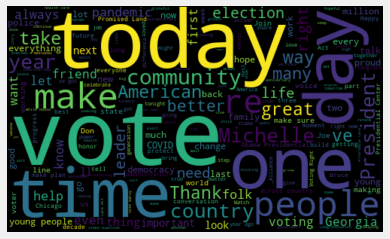

In [47]:
#plotting the word cloud
allWords =' '.join( [twts for twts in df['tweets']] )
wordCloud= WordCloud(width = 500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
#create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df
  

posted time              user_id  ...  Polarity  Analysis
0   2021-10-03 19:01:49  1444739482050301953  ...  0.483333  Positive
1   2021-10-01 21:03:01  1444045206916063234  ...  0.411111  Positive
2   2021-09-28 22:43:00  1442983205502586882  ... -0.100000  Negative
3   2021-09-28 18:24:16  1442918092892299264  ...  0.137500  Positive
4   2021-09-28 18:02:40  1442912660522106882  ...  0.500000  Positive
..                  ...                  ...  ...       ...       ...
495 2020-04-14 16:02:07  1250091976487317507  ...  0.537500  Positive
496 2020-04-14 15:47:23  1250088269502709762  ...  0.800000  Positive
497 2020-04-13 18:01:58  1249759749102546946  ...  0.200000  Positive
498 2020-04-13 15:33:36  1249722411781668865  ...  0.000000   Neutral
499 2020-04-12 14:41:33  1249346924102275072  ...  0.000000   Neutral

[500 rows x 18 columns]

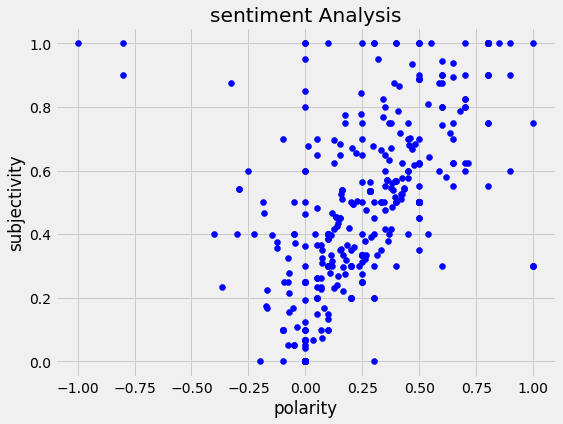

In [59]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color="Blue")
plt.title('sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [64]:
#get the percentage of positive words
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
round( (ptweets.shape[0]/df.shape[0])*100,1)

57.6

In [67]:
#get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
round( (ntweets.shape[0]/df.shape[0])*100,1)

8.4

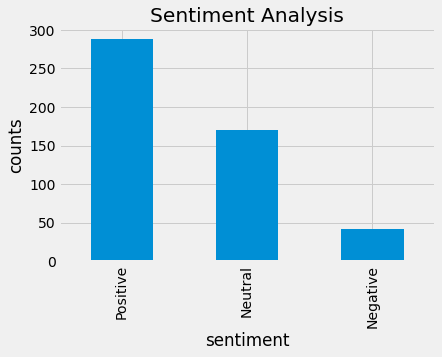

In [68]:
#plot and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

We can see that obama used more of positive and neutral words,less of negative words in his twitter account.

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order.

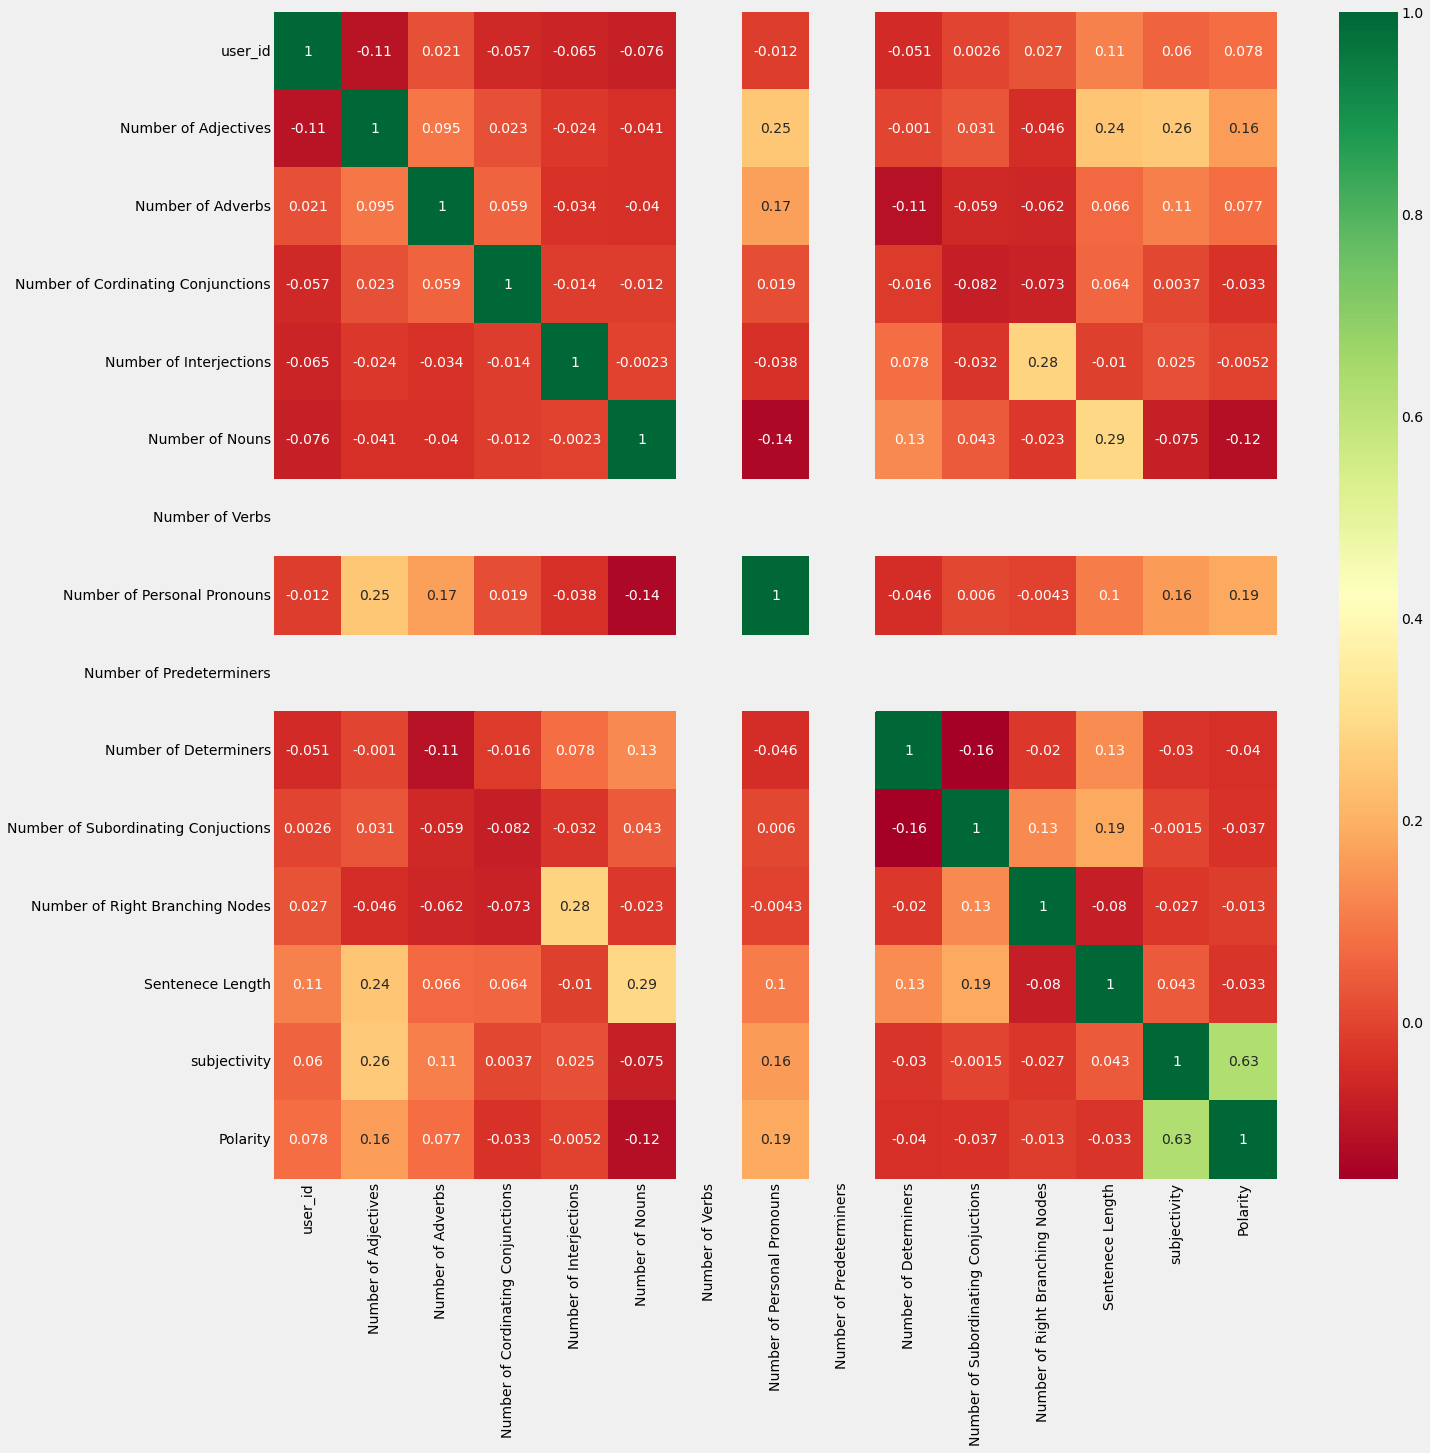

In [72]:
# You code here (Please add comments in the code):
#Correlation Matrix with Heatmap
import seaborn as sns
#get correlations of each features in dataframe
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


The above heat map provides the correlation between the features.If taking polarity as target variable in the above dataframe we can see that subjectivity has the highest correlation with polarity followed by number of personal pronouns,so.on
giving the rank in descending order for target variable polarity.



In [110]:
import pandas as pd
features = pd.DataFrame(df.columns)
features

0
0                           posted time
1                               user_id
2                                tweets
3                  Number of Adjectives
4                     Number of Adverbs
5    Number of Cordinating Conjunctions
6               Number of Interjections
7                       Number of Nouns
8                       Number of Verbs
9           Number of Personal Pronouns
10             Number of Predeterminers
11                Number of Determiners
12  Number of Subordinating Conjuctions
13      Number of Right Branching Nodes
14                     Sentenece Length
15                         subjectivity
16                             Polarity
17                             Analysis

In [111]:
rank = ['nan',5,'nan',4,5,10,7,12,'nan',3,'nan',11,13,9,8,2,1,'nan']

In [114]:
features['rank']=rank
features

0 rank
0                           posted time  nan
1                               user_id    5
2                                tweets  nan
3                  Number of Adjectives    4
4                     Number of Adverbs    5
5    Number of Cordinating Conjunctions   10
6               Number of Interjections    7
7                       Number of Nouns   12
8                       Number of Verbs  nan
9           Number of Personal Pronouns    3
10             Number of Predeterminers  nan
11                Number of Determiners   11
12  Number of Subordinating Conjuctions   13
13      Number of Right Branching Nodes    9
14                     Sentenece Length    8
15                         subjectivity    2
16                             Polarity    1
17                             Analysis  nan